In [2]:
#import pandas
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from scipy.stats import norm
import seaborn as sns
from scipy import stats
import scipy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import shapiro

In [3]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score, roc_curve, mean_squared_error
from catboost import CatBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

In [4]:
df = pd.read_csv("hmelq.csv")

In [5]:
df.head(5) # to see the first 5 rows of dataset

,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc
0,0,81200,18834.0,108355.0,HomeImp,NaN,28.0,0.0,0.0,139.14,0.0,14.0,34.042
1,0,12600,103960.0,127384.0,DebtCon,NaN,2.0,0.0,0.0,129.02,0.0,25.0,34.479
2,0,18000,46865.0,61266.0,DebtCon,NaN,5.0,0.0,0.0,102.59,2.0,9.0,26.354
3,0,10300,57676.0,71027.0,DebtCon,NaN,19.0,0.0,0.0,157.52,1.0,11.0,33.992
4,0,9400,56508.0,78358.0,DebtCon,NaN,17.0,0.0,0.0,141.93,0.0,11.0,32.327


In [6]:
df.shape #to look at the shape of the dataset

(3576, 13)

In [7]:
for i in df.select_dtypes(include=["object"]).columns:
    print(i,": ",df[i].value_counts().count())
#information about the categoric values

reason :  2
job :  6


In [8]:
name_of_col = list(df.columns)
num_var_list = []
str_var_list = []
drop_col=[]

str_var_list = name_of_col.copy()
for var in name_of_col:
    # check if column belongs to numeric type
    if (df[var].dtypes in (np.int, np.int64, np.uint, np.int32, np.float,
                            np.float64, np.float32, np.double)):
        str_var_list.remove(var)
        num_var_list.append(var)
# drop the omit column from list
for var in drop_col:
    if var in str_var_list:
        str_var_list.remove(var)
    if var in num_var_list:
        num_var_list.remove(var)

print("Numeric Column  :", num_var_list,
      "\nCategoric Column :", str_var_list)

# which columns categoric or numeric.

Numeric Column  : ['bad', 'loan', 'mortdue', 'value', 'yoj', 'derog', 'delinq', 'clage', 'ninq', 'clno', 'debtinc'] 
Categoric Column : ['reason', 'job']


In [9]:
df=df.dropna()
#remove the non values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2018 entries, 153 to 3549
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   bad      2018 non-null   int64  
 1   loan     2018 non-null   int64  
 2   mortdue  2018 non-null   float64
 3   value    2018 non-null   float64
 4   reason   2018 non-null   object 
 5   job      2018 non-null   object 
 6   yoj      2018 non-null   float64
 7   derog    2018 non-null   float64
 8   delinq   2018 non-null   float64
 9   clage    2018 non-null   float64
 10  ninq     2018 non-null   float64
 11  clno     2018 non-null   float64
 12  debtinc  2018 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 220.7+ KB


In [10]:
MissingData=df.isnull().sum().rename_axis('Variables').reset_index(name='Missing Values') # the isnull() returns 1 if the value is null
MissingData

,Variables,Missing Values
0,bad,0
1,loan,0
2,mortdue,0
3,value,0
4,reason,0
5,job,0
6,yoj,0
7,derog,0
8,delinq,0
9,clage,0


In [11]:
#dropping rows that have missing data
df.dropna(axis=0, how='any', inplace=True)
df

,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc
153,0,18200,94727.0,136877.0,DebtCon,Mgr,15.0,0.0,0.0,168.96,2.0,26.0,36.056
154,0,21700,79240.0,96784.0,DebtCon,Mgr,5.0,0.0,0.0,64.51,6.0,24.0,38.079
155,0,34100,241931.0,36486.0,DebtCon,Mgr,1.0,0.0,2.0,196.01,3.0,50.0,42.459
156,0,8400,62989.0,76718.0,HomeImp,Mgr,3.0,0.0,2.0,131.47,0.0,22.0,29.200
157,0,17400,25859.0,43684.0,DebtCon,Mgr,16.0,1.0,0.0,95.36,1.0,17.0,27.108
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3544,1,7200,15637.0,39660.0,HomeImp,Self,6.0,0.0,1.0,354.24,3.0,42.0,33.624
3546,1,53400,228236.0,305514.0,HomeImp,Self,6.0,0.0,0.0,11.15,0.0,2.0,34.558
3547,1,27300,106221.0,137727.0,DebtCon,Self,3.0,0.0,0.0,300.57,3.0,45.0,32.560
3548,1,37300,68789.0,86172.0,HomeImp,Self,2.0,0.0,6.0,235.64,2.0,25.0,114.051


In [12]:
#encoding
df=pd.get_dummies(df, columns=['reason','job'])
df

,bad,loan,mortdue,value,yoj,derog,delinq,clage,ninq,clno,debtinc,reason_DebtCon,reason_HomeImp,job_Mgr,job_Office,job_Other,job_ProfEx,job_Sales,job_Self
153,0,18200,94727.0,136877.0,15.0,0.0,0.0,168.96,2.0,26.0,36.056,1,0,1,0,0,0,0,0
154,0,21700,79240.0,96784.0,5.0,0.0,0.0,64.51,6.0,24.0,38.079,1,0,1,0,0,0,0,0
155,0,34100,241931.0,36486.0,1.0,0.0,2.0,196.01,3.0,50.0,42.459,1,0,1,0,0,0,0,0
156,0,8400,62989.0,76718.0,3.0,0.0,2.0,131.47,0.0,22.0,29.200,0,1,1,0,0,0,0,0
157,0,17400,25859.0,43684.0,16.0,1.0,0.0,95.36,1.0,17.0,27.108,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3544,1,7200,15637.0,39660.0,6.0,0.0,1.0,354.24,3.0,42.0,33.624,0,1,0,0,0,0,0,1
3546,1,53400,228236.0,305514.0,6.0,0.0,0.0,11.15,0.0,2.0,34.558,0,1,0,0,0,0,0,1
3547,1,27300,106221.0,137727.0,3.0,0.0,0.0,300.57,3.0,45.0,32.560,1,0,0,0,0,0,0,1
3548,1,37300,68789.0,86172.0,2.0,0.0,6.0,235.64,2.0,25.0,114.051,0,1,0,0,0,0,0,1


In [13]:
# Extract independent and target variables
X = df.drop(['bad'], axis=1)
y = df['bad']

# Gradient Boosting
Normal hızdaki boosting;

In [ ]:
#Datamızdaki 0ların ve 1lerin oranı unbalaced ise boosting uygulamaları daha uygundur çünkü bu modellerde 
#daha iyi öğrendiği sampleları seçmeye eğilimlidir.

In [14]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)
print(X_train)
print(y_test)


       loan   mortdue     value   yoj  derog  delinq   clage  ninq  clno  \
1490  47900   95377.0  157273.0  16.0    0.0     0.0  236.30   8.0  18.0   
2508   8700   79062.0   98038.0   4.0    0.0     0.0  139.26   0.0  26.0   
1301  25100   58042.0   98964.0  16.0    0.0     1.0  125.80   0.0  29.0   
262   22900  107241.0  138883.0   9.0    1.0     0.0  201.79   5.0  18.0   
2750  18500   10934.0   66367.0   1.0    0.0     0.0  326.57   0.0   5.0   
...     ...       ...       ...   ...    ...     ...     ...   ...   ...   
1273  16100   72942.0   99544.0   5.0    2.0     0.0   54.95   1.0  20.0   
1668  11500  104610.0  118861.0  18.0    0.0     1.0  203.70   1.0  16.0   
2497   7500   60192.0   76475.0   8.0    0.0     0.0   60.50   2.0  24.0   
835   21500   71636.0   96678.0  13.0    0.0     0.0  135.94   0.0  13.0   
1118   7600   58622.0   77726.0  15.0    0.0     0.0  249.63   2.0  36.0   

      debtinc  reason_DebtCon  reason_HomeImp  job_Mgr  job_Office  job_Other  \
1490  

In [12]:
from sklearn.ensemble import GradientBoostingClassifier

In [21]:
gbm_model=GradientBoostingClassifier().fit(X_train,y_train) #default degerlerle model kurduk

In [22]:
y_pred=gbm_model.predict(X_test)#default degerlerden kurulan modelden tahmin edilen y lerimizi aldık


In [23]:
accuracy_score(y_test,y_pred) #gercek y degerleri ile modelimizin tahmin ettigi y degerlerinin farkından accuracyi bulduk

0.9537953795379538

In [24]:
print(classification_report(y_test,y_pred)) #en iyi degerlerle kurulan modelimizin basarisini inceleriz
#0 lar icin; precision ve f1 degeri iyilesmis
#1 ler icin ;tüm degerler iyilesmis


              precision    recall  f1-score   support

           0       0.96      0.99      0.98       553
           1       0.90      0.53      0.67        53

    accuracy                           0.95       606
   macro avg       0.93      0.76      0.82       606
weighted avg       0.95      0.95      0.95       606



# Gradient Boosting Model Tuning




In [25]:
gbm_params={"learning_rate":[0.001,0.01,0.1,0.05],"n_estimators":[10,50,100],"max_depth":[3,5,10],"min_samples_split":[2,5,10]}


In [26]:
gbm=GradientBoostingClassifier()
gbm_cv=GridSearchCV(gbm,gbm_params,cv=10,n_jobs=-1,verbose=5)

In [27]:
gbm_cv.fit(X_train,y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   11.8s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:   31.1s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   44.7s
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 874 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:  2.2min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_...
                 

In [28]:
print("En iyi parametreler: "+str(gbm_cv.best_params_))

En iyi parametreler: {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_split': 10, 'n_estimators': 100}


In [29]:


gbm=GradientBoostingClassifier(learning_rate=0.1,max_depth=10,min_samples_split=5,n_estimators=50)



In [30]:
gbm_tuned=gbm.fit(X_train,y_train) #en iyi parametrelerle modelimizi tekrar kurduk

In [31]:
y_pred=gbm_tuned.predict(X_test)
accuracy_score(y_test,y_pred)


0.9471947194719472

In [33]:


print(classification_report(y_test,y_pred)) #en iyi degerlerle kurulan modelimizin basarisini inceleriz
#0 lar icin; precision ve f1 degeri iyilesmis
#1 ler icin ;tüm degerler iyilesmis



              precision    recall  f1-score   support

           0       0.96      0.98      0.97       553
           1       0.77      0.57      0.65        53

    accuracy                           0.95       606
   macro avg       0.86      0.77      0.81       606
weighted avg       0.94      0.95      0.94       606



In [34]:
Importance = pd.DataFrame({"Importance":gbm_tuned.feature_importances_*100}, index=X_train.columns)

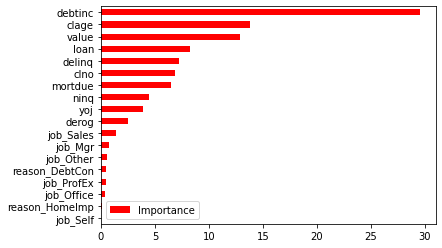

In [35]:
Importance.sort_values(by="Importance", axis=0, ascending=True).plot(kind="barh", color ='r')
plt.show()

# Cat Boosting

In [39]:
cat_model=CatBoostClassifier().fit(X_train,y_train) #default degerlerle model kurduk

Learning rate set to 0.011938
0:	learn: 0.6789891	total: 49.6ms	remaining: 49.5s
1:	learn: 0.6660530	total: 51.6ms	remaining: 25.8s
2:	learn: 0.6550235	total: 52.9ms	remaining: 17.6s
3:	learn: 0.6435842	total: 55.3ms	remaining: 13.8s
4:	learn: 0.6327794	total: 57.7ms	remaining: 11.5s
5:	learn: 0.6206049	total: 59.3ms	remaining: 9.83s
6:	learn: 0.6092050	total: 60.4ms	remaining: 8.57s
7:	learn: 0.5967839	total: 61.9ms	remaining: 7.67s
8:	learn: 0.5852434	total: 63.3ms	remaining: 6.96s
9:	learn: 0.5740570	total: 64.7ms	remaining: 6.41s
10:	learn: 0.5646644	total: 66.1ms	remaining: 5.94s
11:	learn: 0.5542572	total: 67.4ms	remaining: 5.55s
12:	learn: 0.5455341	total: 73ms	remaining: 5.54s
13:	learn: 0.5360114	total: 77.1ms	remaining: 5.43s
14:	learn: 0.5276848	total: 78.9ms	remaining: 5.18s
15:	learn: 0.5197023	total: 80.3ms	remaining: 4.94s
16:	learn: 0.5116255	total: 81.6ms	remaining: 4.72s
17:	learn: 0.5026298	total: 83ms	remaining: 4.53s
18:	learn: 0.4940043	total: 84.4ms	remaining: 4.

215:	learn: 0.1630834	total: 388ms	remaining: 1.41s
216:	learn: 0.1629053	total: 390ms	remaining: 1.41s
217:	learn: 0.1625270	total: 392ms	remaining: 1.41s
218:	learn: 0.1622182	total: 393ms	remaining: 1.4s
219:	learn: 0.1619989	total: 395ms	remaining: 1.4s
220:	learn: 0.1617551	total: 396ms	remaining: 1.4s
221:	learn: 0.1614903	total: 397ms	remaining: 1.39s
222:	learn: 0.1611015	total: 399ms	remaining: 1.39s
223:	learn: 0.1607776	total: 400ms	remaining: 1.39s
224:	learn: 0.1603015	total: 402ms	remaining: 1.38s
225:	learn: 0.1598891	total: 404ms	remaining: 1.38s
226:	learn: 0.1596943	total: 406ms	remaining: 1.38s
227:	learn: 0.1595142	total: 407ms	remaining: 1.38s
228:	learn: 0.1592001	total: 409ms	remaining: 1.38s
229:	learn: 0.1587190	total: 411ms	remaining: 1.38s
230:	learn: 0.1584897	total: 412ms	remaining: 1.37s
231:	learn: 0.1582350	total: 414ms	remaining: 1.37s
232:	learn: 0.1580625	total: 419ms	remaining: 1.38s
233:	learn: 0.1577700	total: 421ms	remaining: 1.38s
234:	learn: 0.1

455:	learn: 0.1139705	total: 772ms	remaining: 922ms
456:	learn: 0.1138928	total: 774ms	remaining: 920ms
457:	learn: 0.1137579	total: 776ms	remaining: 918ms
458:	learn: 0.1136065	total: 778ms	remaining: 916ms
459:	learn: 0.1134919	total: 779ms	remaining: 914ms
460:	learn: 0.1133014	total: 780ms	remaining: 912ms
461:	learn: 0.1131749	total: 782ms	remaining: 910ms
462:	learn: 0.1130285	total: 783ms	remaining: 908ms
463:	learn: 0.1129685	total: 785ms	remaining: 907ms
464:	learn: 0.1126994	total: 787ms	remaining: 905ms
465:	learn: 0.1125748	total: 789ms	remaining: 904ms
466:	learn: 0.1124800	total: 790ms	remaining: 902ms
467:	learn: 0.1123965	total: 793ms	remaining: 902ms
468:	learn: 0.1123094	total: 795ms	remaining: 900ms
469:	learn: 0.1122252	total: 797ms	remaining: 898ms
470:	learn: 0.1120708	total: 798ms	remaining: 897ms
471:	learn: 0.1119334	total: 801ms	remaining: 896ms
472:	learn: 0.1117931	total: 802ms	remaining: 894ms
473:	learn: 0.1116823	total: 803ms	remaining: 892ms
474:	learn: 

682:	learn: 0.0852170	total: 1.15s	remaining: 534ms
683:	learn: 0.0851436	total: 1.15s	remaining: 532ms
684:	learn: 0.0850811	total: 1.15s	remaining: 531ms
685:	learn: 0.0849078	total: 1.16s	remaining: 529ms
686:	learn: 0.0848678	total: 1.16s	remaining: 527ms
687:	learn: 0.0847836	total: 1.16s	remaining: 526ms
688:	learn: 0.0847137	total: 1.16s	remaining: 524ms
689:	learn: 0.0845850	total: 1.16s	remaining: 522ms
690:	learn: 0.0844903	total: 1.16s	remaining: 520ms
691:	learn: 0.0842709	total: 1.17s	remaining: 519ms
692:	learn: 0.0840848	total: 1.17s	remaining: 518ms
693:	learn: 0.0840179	total: 1.17s	remaining: 516ms
694:	learn: 0.0838695	total: 1.17s	remaining: 514ms
695:	learn: 0.0837497	total: 1.17s	remaining: 513ms
696:	learn: 0.0836384	total: 1.18s	remaining: 511ms
697:	learn: 0.0835440	total: 1.18s	remaining: 510ms
698:	learn: 0.0834766	total: 1.18s	remaining: 509ms
699:	learn: 0.0833913	total: 1.18s	remaining: 507ms
700:	learn: 0.0832683	total: 1.19s	remaining: 505ms
701:	learn: 

923:	learn: 0.0643561	total: 1.53s	remaining: 126ms
924:	learn: 0.0643001	total: 1.53s	remaining: 124ms
925:	learn: 0.0642721	total: 1.54s	remaining: 123ms
926:	learn: 0.0641688	total: 1.54s	remaining: 121ms
927:	learn: 0.0641000	total: 1.55s	remaining: 120ms
928:	learn: 0.0639690	total: 1.55s	remaining: 118ms
929:	learn: 0.0638285	total: 1.55s	remaining: 117ms
930:	learn: 0.0637405	total: 1.55s	remaining: 115ms
931:	learn: 0.0637097	total: 1.55s	remaining: 113ms
932:	learn: 0.0636723	total: 1.55s	remaining: 112ms
933:	learn: 0.0636332	total: 1.56s	remaining: 110ms
934:	learn: 0.0635568	total: 1.56s	remaining: 109ms
935:	learn: 0.0634040	total: 1.56s	remaining: 107ms
936:	learn: 0.0632780	total: 1.56s	remaining: 105ms
937:	learn: 0.0632145	total: 1.57s	remaining: 104ms
938:	learn: 0.0631996	total: 1.57s	remaining: 102ms
939:	learn: 0.0631517	total: 1.57s	remaining: 100ms
940:	learn: 0.0630552	total: 1.57s	remaining: 98.5ms
941:	learn: 0.0629924	total: 1.57s	remaining: 96.8ms
942:	learn

In [40]:
y_pred=cat_model.predict(X_test)#default degerlerden kurulan modelden tahmin edilen y lerimizi aldık


In [41]:
accuracy_score(y_test,y_pred)


0.9521452145214522

# Cat Boosting Modeltuning

In [43]:
catb_params = {
    'iterations':[200,500],
    
    'learning_rate': [0.01, 0.05, 0.1],
    'depth' : [3,5,8]
}

In [44]:
catb = CatBoostClassifier()
catb_cv_model = GridSearchCV(catb, catb_params, cv=10, n_jobs=-1, verbose=2)

catb_cv_model.fit(X_train, y_train)
catb_cv_model.best_params_

Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  1.9min finished


0:	learn: 0.6364636	total: 1.51ms	remaining: 754ms
1:	learn: 0.5895897	total: 2.82ms	remaining: 703ms
2:	learn: 0.5509454	total: 3.95ms	remaining: 655ms
3:	learn: 0.5101750	total: 5.15ms	remaining: 638ms
4:	learn: 0.4787651	total: 6.4ms	remaining: 634ms
5:	learn: 0.4501893	total: 7.59ms	remaining: 625ms
6:	learn: 0.4226267	total: 8.81ms	remaining: 620ms
7:	learn: 0.3996431	total: 10ms	remaining: 616ms
8:	learn: 0.3802464	total: 11.2ms	remaining: 609ms
9:	learn: 0.3592763	total: 12.3ms	remaining: 604ms
10:	learn: 0.3428258	total: 13.5ms	remaining: 600ms
11:	learn: 0.3295775	total: 14.7ms	remaining: 596ms
12:	learn: 0.3159759	total: 15.9ms	remaining: 596ms
13:	learn: 0.3050896	total: 17.1ms	remaining: 594ms
14:	learn: 0.2934204	total: 18.3ms	remaining: 591ms
15:	learn: 0.2858282	total: 19.4ms	remaining: 587ms
16:	learn: 0.2776676	total: 20.6ms	remaining: 586ms
17:	learn: 0.2712249	total: 21.8ms	remaining: 583ms
18:	learn: 0.2632335	total: 22.9ms	remaining: 581ms
19:	learn: 0.2571230	tota

160:	learn: 0.1044816	total: 195ms	remaining: 410ms
161:	learn: 0.1041206	total: 196ms	remaining: 410ms
162:	learn: 0.1034539	total: 198ms	remaining: 409ms
163:	learn: 0.1030568	total: 199ms	remaining: 408ms
164:	learn: 0.1029308	total: 201ms	remaining: 408ms
165:	learn: 0.1027917	total: 204ms	remaining: 410ms
166:	learn: 0.1022437	total: 206ms	remaining: 410ms
167:	learn: 0.1016667	total: 208ms	remaining: 412ms
168:	learn: 0.1014386	total: 211ms	remaining: 412ms
169:	learn: 0.1012002	total: 212ms	remaining: 411ms
170:	learn: 0.1008235	total: 213ms	remaining: 410ms
171:	learn: 0.1001525	total: 214ms	remaining: 409ms
172:	learn: 0.0995062	total: 216ms	remaining: 407ms
173:	learn: 0.0990603	total: 217ms	remaining: 406ms
174:	learn: 0.0989757	total: 218ms	remaining: 405ms
175:	learn: 0.0985164	total: 219ms	remaining: 403ms
176:	learn: 0.0984210	total: 220ms	remaining: 402ms
177:	learn: 0.0980662	total: 221ms	remaining: 401ms
178:	learn: 0.0974346	total: 223ms	remaining: 400ms
179:	learn: 

455:	learn: 0.0352279	total: 575ms	remaining: 55.5ms
456:	learn: 0.0350068	total: 578ms	remaining: 54.4ms
457:	learn: 0.0348156	total: 579ms	remaining: 53.1ms
458:	learn: 0.0346990	total: 581ms	remaining: 51.9ms
459:	learn: 0.0345208	total: 582ms	remaining: 50.6ms
460:	learn: 0.0344590	total: 583ms	remaining: 49.3ms
461:	learn: 0.0343335	total: 592ms	remaining: 48.7ms
462:	learn: 0.0342313	total: 593ms	remaining: 47.4ms
463:	learn: 0.0341689	total: 594ms	remaining: 46.1ms
464:	learn: 0.0340756	total: 595ms	remaining: 44.8ms
465:	learn: 0.0340034	total: 597ms	remaining: 43.5ms
466:	learn: 0.0338571	total: 598ms	remaining: 42.2ms
467:	learn: 0.0337011	total: 599ms	remaining: 40.9ms
468:	learn: 0.0335693	total: 600ms	remaining: 39.7ms
469:	learn: 0.0334589	total: 603ms	remaining: 38.5ms
470:	learn: 0.0332622	total: 605ms	remaining: 37.2ms
471:	learn: 0.0332135	total: 607ms	remaining: 36ms
472:	learn: 0.0331260	total: 609ms	remaining: 34.7ms
473:	learn: 0.0331012	total: 610ms	remaining: 33

{'depth': 5, 'iterations': 500, 'learning_rate': 0.05}



    estimator: estimator object you created

    params_grid: the dictionary object that holds the hyperparameters you want to try

    scoring: evaluation metric that you want to use, you can simply pass a valid string/ object of evaluation metric

    cv: number of cross-validation you have to try for each selected set of hyperparameters


In [45]:
print("En iyi parametreler: "+str(catb_cv_model.best_params_))

En iyi parametreler: {'depth': 5, 'iterations': 500, 'learning_rate': 0.05}


In [34]:
catb=CatBoostClassifier(learning_rate=0.05,
                               depth=5,iterations= 500)

In [35]:
catb_tuned=catb.fit(X_train,y_train)

0:	learn: 0.6364636	total: 49.1ms	remaining: 24.5s
1:	learn: 0.5895897	total: 50.3ms	remaining: 12.5s
2:	learn: 0.5509454	total: 52.1ms	remaining: 8.64s
3:	learn: 0.5101750	total: 54.5ms	remaining: 6.76s
4:	learn: 0.4787651	total: 56ms	remaining: 5.55s
5:	learn: 0.4501893	total: 57.8ms	remaining: 4.76s
6:	learn: 0.4226267	total: 58.9ms	remaining: 4.15s
7:	learn: 0.3996431	total: 60ms	remaining: 3.69s
8:	learn: 0.3802464	total: 61ms	remaining: 3.33s
9:	learn: 0.3592763	total: 62ms	remaining: 3.04s
10:	learn: 0.3428258	total: 63.1ms	remaining: 2.81s
11:	learn: 0.3295775	total: 64.2ms	remaining: 2.61s
12:	learn: 0.3159759	total: 65.2ms	remaining: 2.44s
13:	learn: 0.3050896	total: 66.8ms	remaining: 2.32s
14:	learn: 0.2934204	total: 67.9ms	remaining: 2.2s
15:	learn: 0.2858282	total: 69.1ms	remaining: 2.09s
16:	learn: 0.2776676	total: 71ms	remaining: 2.02s
17:	learn: 0.2712249	total: 72.4ms	remaining: 1.94s
18:	learn: 0.2632335	total: 73.5ms	remaining: 1.86s
19:	learn: 0.2571230	total: 74.5m

168:	learn: 0.1014386	total: 239ms	remaining: 468ms
169:	learn: 0.1012002	total: 244ms	remaining: 474ms
170:	learn: 0.1008235	total: 245ms	remaining: 472ms
171:	learn: 0.1001525	total: 246ms	remaining: 470ms
172:	learn: 0.0995062	total: 248ms	remaining: 468ms
173:	learn: 0.0990603	total: 249ms	remaining: 466ms
174:	learn: 0.0989757	total: 250ms	remaining: 465ms
175:	learn: 0.0985164	total: 252ms	remaining: 464ms
176:	learn: 0.0984210	total: 253ms	remaining: 463ms
177:	learn: 0.0980662	total: 255ms	remaining: 461ms
178:	learn: 0.0974346	total: 257ms	remaining: 460ms
179:	learn: 0.0972073	total: 258ms	remaining: 459ms
180:	learn: 0.0971027	total: 260ms	remaining: 458ms
181:	learn: 0.0967386	total: 261ms	remaining: 457ms
182:	learn: 0.0967104	total: 263ms	remaining: 455ms
183:	learn: 0.0966813	total: 264ms	remaining: 453ms
184:	learn: 0.0957681	total: 266ms	remaining: 452ms
185:	learn: 0.0955706	total: 267ms	remaining: 451ms
186:	learn: 0.0954504	total: 269ms	remaining: 450ms
187:	learn: 

452:	learn: 0.0354896	total: 620ms	remaining: 64.3ms
453:	learn: 0.0354221	total: 623ms	remaining: 63.1ms
454:	learn: 0.0352999	total: 625ms	remaining: 61.8ms
455:	learn: 0.0352279	total: 626ms	remaining: 60.4ms
456:	learn: 0.0350068	total: 629ms	remaining: 59.2ms
457:	learn: 0.0348156	total: 631ms	remaining: 57.8ms
458:	learn: 0.0346990	total: 632ms	remaining: 56.5ms
459:	learn: 0.0345208	total: 638ms	remaining: 55.4ms
460:	learn: 0.0344590	total: 640ms	remaining: 54.1ms
461:	learn: 0.0343335	total: 641ms	remaining: 52.7ms
462:	learn: 0.0342313	total: 642ms	remaining: 51.3ms
463:	learn: 0.0341689	total: 644ms	remaining: 49.9ms
464:	learn: 0.0340756	total: 645ms	remaining: 48.6ms
465:	learn: 0.0340034	total: 646ms	remaining: 47.2ms
466:	learn: 0.0338571	total: 648ms	remaining: 45.8ms
467:	learn: 0.0337011	total: 649ms	remaining: 44.4ms
468:	learn: 0.0335693	total: 650ms	remaining: 43ms
469:	learn: 0.0334589	total: 652ms	remaining: 41.6ms
470:	learn: 0.0332622	total: 653ms	remaining: 40

In [36]:
y_pred=catb_tuned.predict(X_test)
accuracy_score(y_test,y_pred)


0.9488448844884488

# SVM

In [55]:


svm_model=SVC(kernel="linear").fit(X_train,y_train)
svm_model
# ylerimi cemer olarak ayrıstırmaya calisirsam "rbf" kullanılırım

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [56]:
y_pred=svm_model.predict(X_test)
accuracy_score(y_test,y_pred)

0.9108910891089109

# SVM TUNED

In [57]:


svc_params={"C":[0.01,5,10,20]} #C=error ratelerdir yani bu error seviyesinde dur bilgisidi
svc=SVC(kernel="linear")
svc_cv_model=GridSearchCV(svc,svc_params,
                         cv=10)



In [60]:
svc_cv_model.fit(X_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='linear', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None, param_grid={'C': [0.01, 5, 10, 20]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [61]:
print("En iyi parametreler: "+str(svc_cv_model.best_params_))

En iyi parametreler: {'C': 5}


In [37]:
svc_tuned = SVC(kernel="linear", C = 5).fit(X_train, y_train) 


In [38]:
y_pred=svc_tuned .predict(X_test)
accuracy_score(y_test,y_pred)


0.9141914191419142

# Gaussian Naive Bayes



In [13]:
from sklearn.naive_bayes import GaussianNB

In [14]:
nb = GaussianNB()
nb_model = nb.fit(X_train, y_train)
nb_model


GaussianNB(priors=None, var_smoothing=1e-09)

In [16]:
nb_model.predict(X_test)[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [19]:
nb_model.predict_proba(X_test)[0:10]

array([[0.99666369, 0.00333631],
       [0.97734893, 0.02265107],
       [0.88816818, 0.11183182],
       [0.93285254, 0.06714746],
       [0.99258156, 0.00741844],
       [0.98626327, 0.01373673],
       [0.95123312, 0.04876688],
       [0.98972379, 0.01027621],
       [0.99472416, 0.00527584],
       [0.98393758, 0.01606242]])

In [20]:
y_pred = nb_model.predict(X_test)

In [21]:
accuracy_score(y_test, y_pred)

0.8976897689768977

In [22]:
cross_val_score(nb_model, X_test, y_test, cv = 10).mean()

0.9307103825136611

# KNN

In [15]:
knn = KNeighborsClassifier()

In [16]:
knn_model = knn.fit(X_train, y_train)

In [17]:
knn_model


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [18]:
y_pred = knn_model.predict(X_test)

In [19]:
accuracy_score(y_test, y_pred)

0.9141914191419142

In [20]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95       553
           1       0.56      0.09      0.16        53

    accuracy                           0.91       606
   macro avg       0.74      0.54      0.56       606
weighted avg       0.89      0.91      0.89       606



# KNN TUNED

In [21]:
knn_params={"n_neighbors":np.arange(2,40),"metric":["minkowski","euclidean","manhattan"]}

In [25]:
knn=KNeighborsClassifier()
knn_cv= GridSearchCV(knn,knn_params,cv=10)
knn_cv.fit(X_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [23]:
print("En iyi skor:"+str(knn_cv.best_score_))
print("En iyi parametreler:"+str(knn_cv.best_params_))

En iyi skor:0.9136050344620917
En iyi parametreler:{'metric': 'manhattan', 'n_neighbors': 17}


In [24]:
knn_tuned=KNeighborsClassifier(n_neighbors=2,metric="manhattan")
knn_tuned.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [26]:
y_pred=knn_tuned.predict(X_test)

In [27]:
accuracy_score(y_test,y_pred)

0.9108910891089109

In [28]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95       553
           1       0.45      0.09      0.16        53

    accuracy                           0.91       606
   macro avg       0.69      0.54      0.55       606
weighted avg       0.88      0.91      0.88       606



In [40]:
modeller = [
    catb_tuned,
    gbm_tuned,
    svc_tuned,
    knn_tuned
]


for model in modeller:
    isimler = model.__class__.__name__
    y_pred = model.predict(X_test)     
    dogruluk = accuracy_score(y_test, y_pred)
    print("-"*28)
    print(isimler + ":" )
    print("Accuracy: {:.4%}".format(dogruluk))

----------------------------
CatBoostClassifier:
Accuracy: 94.8845%
----------------------------
GradientBoostingClassifier:
Accuracy: 94.7195%
----------------------------
SVC:
Accuracy: 91.4191%
----------------------------
KNeighborsClassifier:
Accuracy: 91.0891%


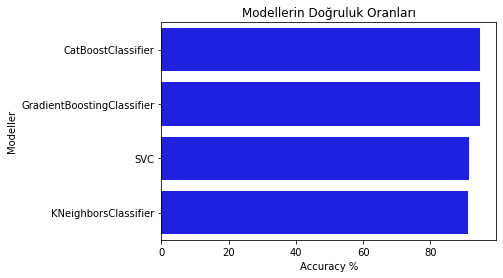

In [41]:
sonuc = []

sonuclar = pd.DataFrame(columns= ["Modeller","Accuracy"])

for model in modeller:
    isimler = model.__class__.__name__
    y_pred = model.predict(X_test)
    dogruluk = accuracy_score(y_test, y_pred)    
    sonuc = pd.DataFrame([[isimler, dogruluk*100]], columns= ["Modeller","Accuracy"])
    sonuclar = sonuclar.append(sonuc)
    
    
sns.barplot(x= 'Accuracy', y = 'Modeller', data=sonuclar, color="b")
plt.xlabel('Accuracy %')
plt.title('Modellerin Doğruluk Oranları');